In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('breast-cancer.csv')

df.drop(['class'], axis='columns', inplace=True)
df


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1
695,841769,2,1,1,1,2,1,1,1,1
696,888820,5,10,10,3,7,3,8,10,2
697,897471,4,8,6,4,3,4,10,6,1


In [12]:
X= df.iloc[:,[2,9]].values
X

array([[ 1,  1],
       [ 4,  1],
       [ 1,  1],
       ...,
       [10,  2],
       [ 8,  1],
       [ 8,  1]], dtype=int64)

Text(0, 0.5, 'unif_cell_size')

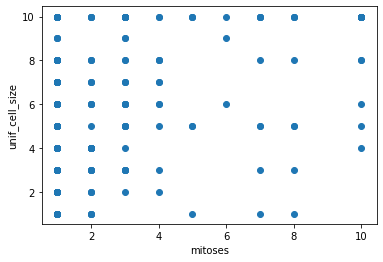

In [13]:

plt.scatter(df.mitoses,df['unif_cell_size'])
plt.xlabel('mitoses')
plt.ylabel('unif_cell_size')

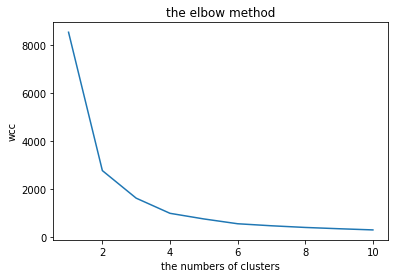

In [14]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcc=[]
for i in range (1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcc.append(km.inertia_)
plt.plot(range(1,11),wcc)
plt.title('the elbow method')
plt.xlabel('the numbers of clusters')
plt.ylabel('wcc')
plt.show()


In [15]:
km=KMeans(n_clusters=3)
km




KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
y_means = km.fit_predict(X)
y_means

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [17]:
df['cluster']=y_means
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,cluster
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,1
4,1017023,4,1,1,3,2,1,3,1,1,0


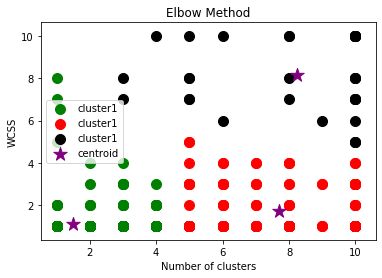

In [18]:
#visualtion

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='green' ,label='cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='red' ,label='cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='black' ,label='cluster3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,color='purple',marker='*',label='centroid')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()